# Decision Tree - Bank Marketing Campaign Prediction

**Objective:** Build a Decision Tree model to predict term deposit subscription.

**Algorithm:** Decision Tree - A tree-based model that makes decisions by learning simple decision rules from features.

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix,
    classification_report, ConfusionMatrixDisplay
)

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load and Explore Data

In [4]:
# Load dataset
df = pd.read_csv('../bank-additional-full.csv', sep=';')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset Shape: (41188, 21)

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Remove duplicates
df_clean = df.drop_duplicates()
print(f"Shape after removing duplicates: {df_clean.shape}")

Shape after removing duplicates: (41176, 21)


## 3. Exploratory Data Analysis

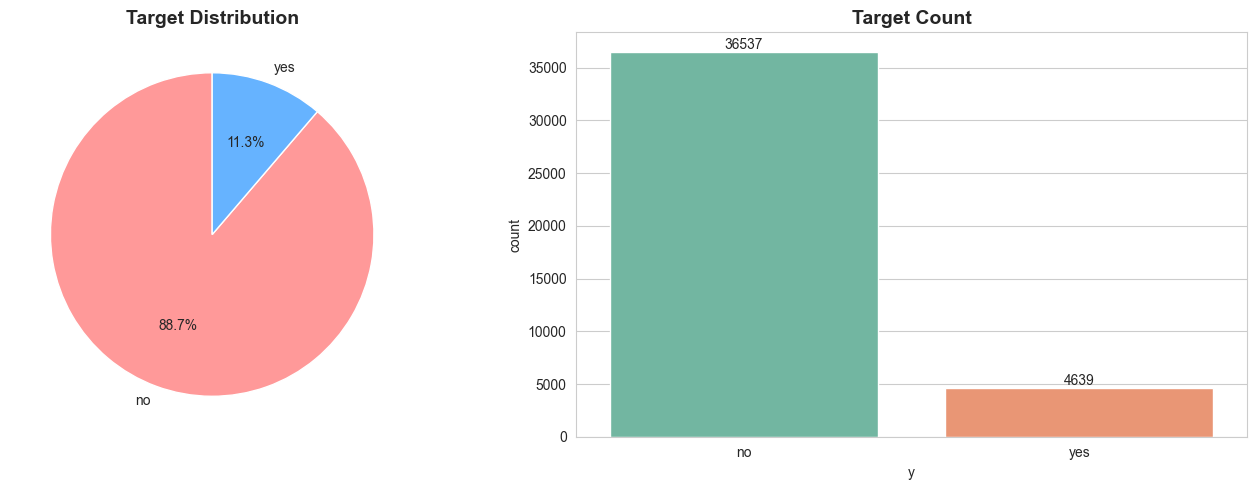

In [6]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

target_counts = df_clean['y'].value_counts()
axes[0].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')

sns.countplot(data=df_clean, x='y', palette='Set2', ax=axes[1])
axes[1].set_title('Target Count', fontsize=14, fontweight='bold')
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.show()

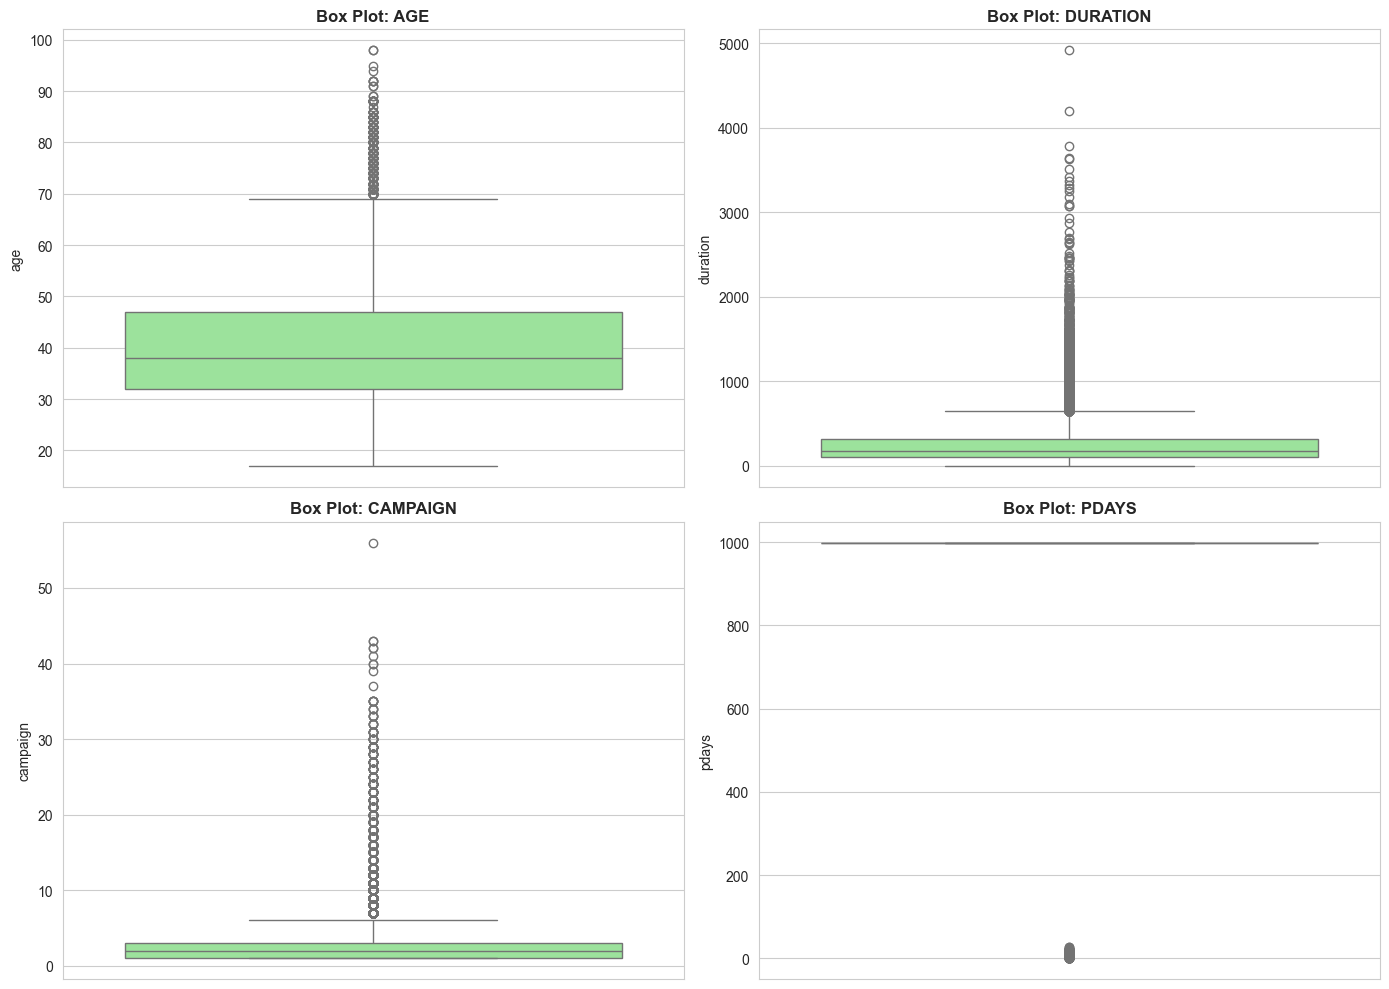

In [7]:
# Box plots for outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

key_numeric = ['age', 'duration', 'campaign', 'pdays']

for idx, col in enumerate(key_numeric):
    sns.boxplot(data=df_clean, y=col, color='lightgreen', ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col.upper()}', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Encode target
df_clean['y'] = df_clean['y'].map({'yes': 1, 'no': 0})

X = df_clean.drop('y', axis=1)
y = df_clean['y']

numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(f"Features: {X.shape}")
print(f"Numerical: {len(numerical_cols)}, Categorical: {len(categorical_cols)}")

Features: (41176, 20)
Numerical: 10, Categorical: 10


In [9]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (32940, 20), Test: (8236, 20)


## 5. Train Decision Tree Model

In [10]:
print("🌳 Training Decision Tree...")

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=42
    ))
])

model.fit(X_train, y_train)

tree = model.named_steps['classifier']
print(f"✅ Trained! Depth: {tree.get_depth()}, Leaves: {tree.get_n_leaves()}")

🌳 Training Decision Tree...
✅ Trained! Depth: 10, Leaves: 302


## 6. Evaluate Model

In [11]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("="*60)
print("📊 DECISION TREE PERFORMANCE")
print("="*60)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")
print("="*60)

print("\n" + classification_report(y_test, y_pred, target_names=['No', 'Yes']))

📊 DECISION TREE PERFORMANCE
Accuracy:  0.9095
Precision: 0.6139
Recall:    0.5312
F1-Score:  0.5696
ROC-AUC:   0.9266

              precision    recall  f1-score   support

          No       0.94      0.96      0.95      7308
         Yes       0.61      0.53      0.57       928

    accuracy                           0.91      8236
   macro avg       0.78      0.74      0.76      8236
weighted avg       0.90      0.91      0.91      8236



## 7. Visualizations

<Figure size 800x600 with 0 Axes>

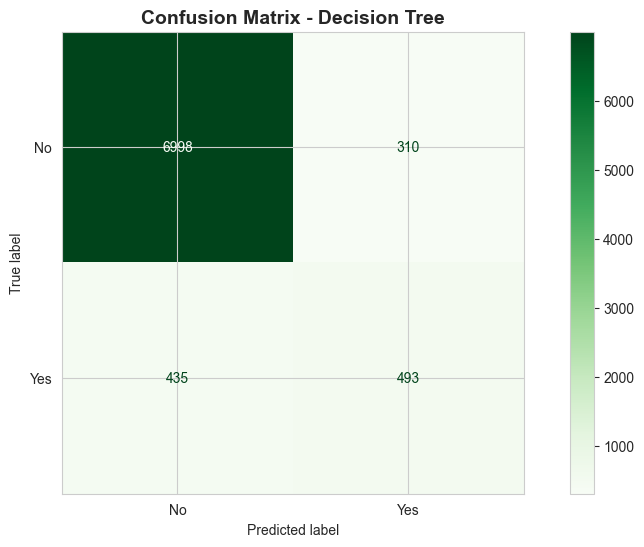

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes']).plot(cmap='Greens')
plt.title('Confusion Matrix - Decision Tree', fontweight='bold', fontsize=14)
plt.show()

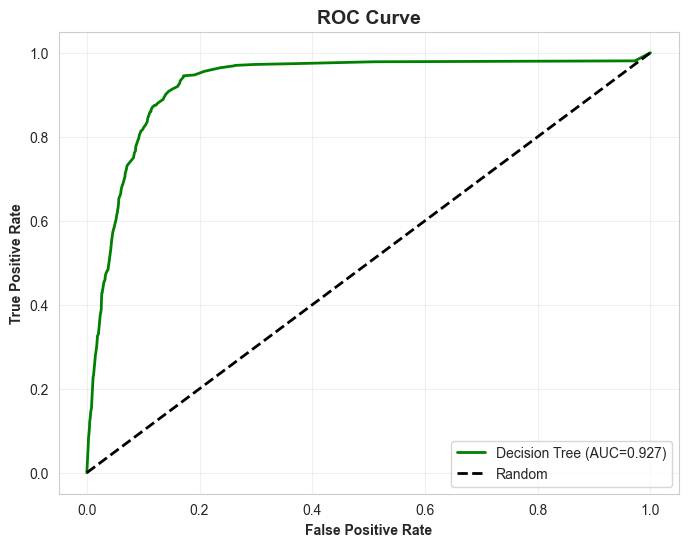

In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'g-', lw=2, label=f'Decision Tree (AUC={roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--', lw=2, label='Random')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title('ROC Curve', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

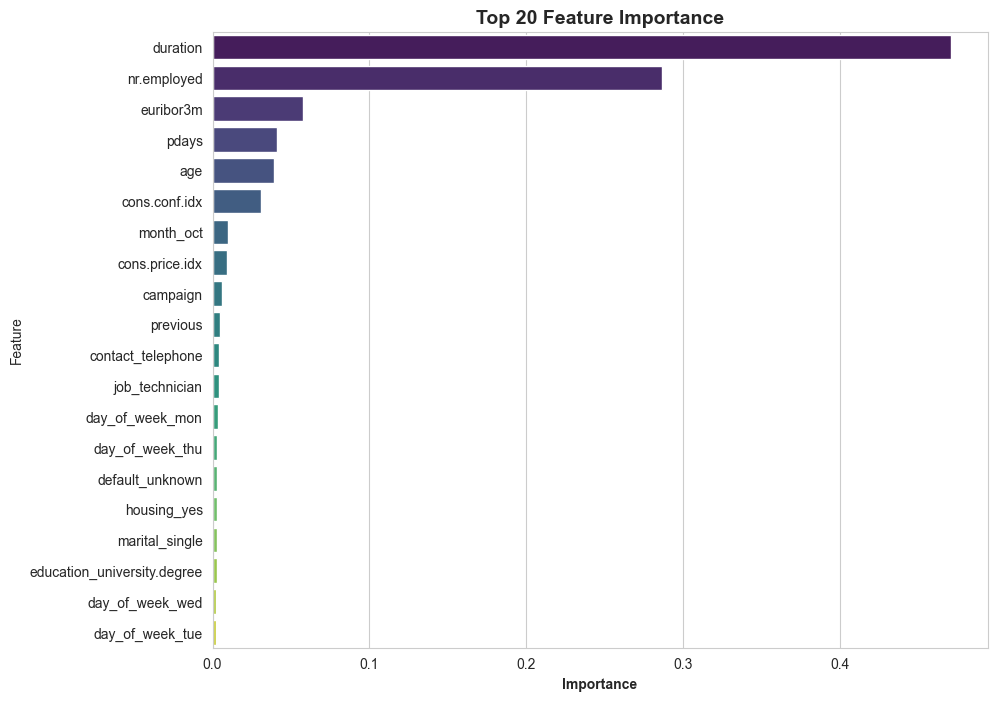


Top 10:
       Feature  Importance
      duration    0.470251
   nr.employed    0.286306
     euribor3m    0.057955
         pdays    0.041076
           age    0.039453
 cons.conf.idx    0.030757
     month_oct    0.009901
cons.price.idx    0.009246
      campaign    0.006150
      previous    0.005041


In [14]:
# Feature Importance
cat_transformer = model.named_steps['preprocessor'].transformers_[1][1]
cat_names = cat_transformer.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_names)

importance = model.named_steps['classifier'].feature_importances_
imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importance})\
    .sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importance', fontweight='bold', fontsize=14)
plt.xlabel('Importance', fontweight='bold')
plt.show()

print("\nTop 10:")
print(imp_df.head(10).to_string(index=False))

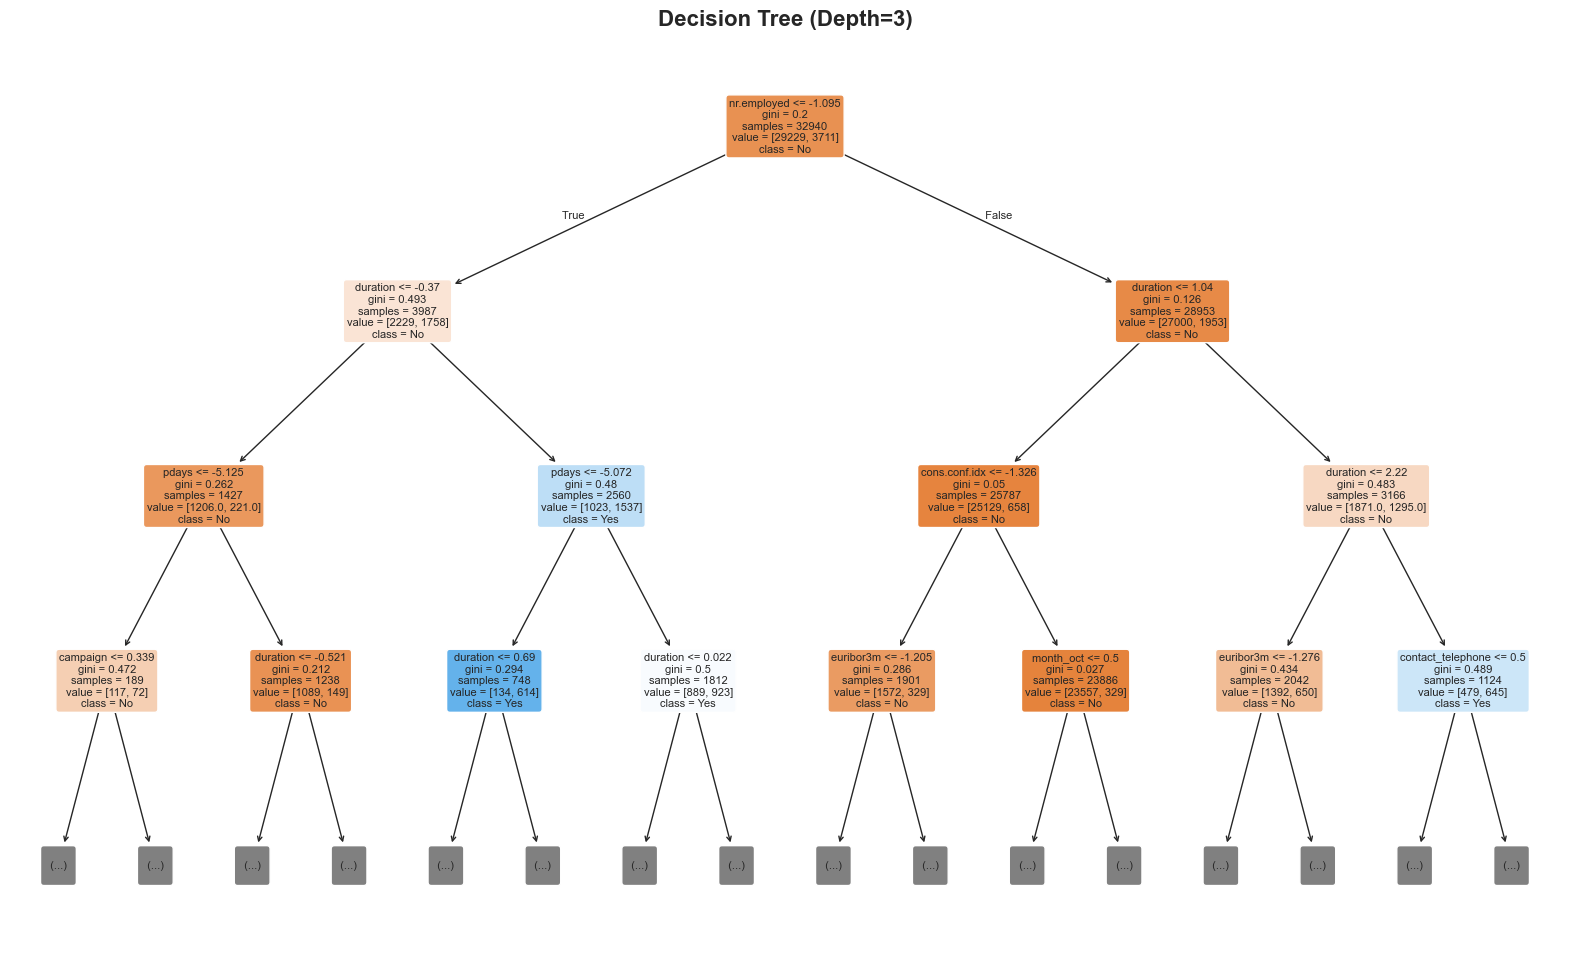

In [15]:
# Tree Visualization
plt.figure(figsize=(20, 12))
plot_tree(tree, feature_names=all_features, class_names=['No','Yes'], 
          filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title('Decision Tree (Depth=3)', fontsize=16, fontweight='bold')
plt.show()

## 8. Prediction Example

In [16]:
# Sample customer
sample = pd.DataFrame({
    'age': [42], 'job': ['technician'], 'marital': ['married'],
    'education': ['professional.course'], 'default': ['no'],
    'housing': ['yes'], 'loan': ['no'], 'contact': ['cellular'],
    'month': ['may'], 'day_of_week': ['thu'], 'duration': [450],
    'campaign': [1], 'pdays': [999], 'previous': [0],
    'poutcome': ['nonexistent'], 'emp.var.rate': [1.1],
    'cons.price.idx': [93.994], 'cons.conf.idx': [-36.4],
    'euribor3m': [4.857], 'nr.employed': [5191.0]
})

print("📋 Sample Customer:")
for col, val in sample.iloc[0].items():
    print(f"{col:20s}: {val}")

📋 Sample Customer:
age                 : 42
job                 : technician
marital             : married
education           : professional.course
default             : no
housing             : yes
loan                : no
contact             : cellular
month               : may
day_of_week         : thu
duration            : 450
campaign            : 1
pdays               : 999
previous            : 0
poutcome            : nonexistent
emp.var.rate        : 1.1
cons.price.idx      : 93.994
cons.conf.idx       : -36.4
euribor3m           : 4.857
nr.employed         : 5191.0



🔮 PREDICTION
Result: ❌ NO
Probability No:  0.9666 (96.7%)
Probability Yes: 0.0334 (3.3%)


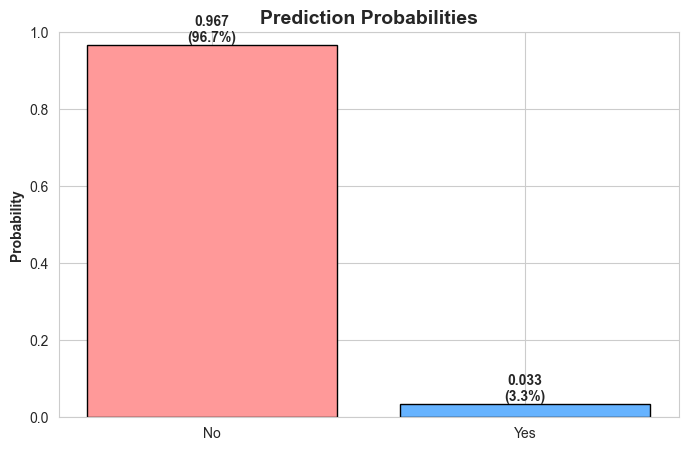

In [17]:
# Predict
pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0]

print("\n🔮 PREDICTION")
print("="*60)
print(f"Result: {'✅ YES' if pred == 1 else '❌ NO'}")
print(f"Probability No:  {prob[0]:.4f} ({prob[0]*100:.1f}%)")
print(f"Probability Yes: {prob[1]:.4f} ({prob[1]*100:.1f}%)")
print("="*60)

# Visualize
plt.figure(figsize=(8, 5))
bars = plt.bar(['No', 'Yes'], prob, color=['#ff9999', '#66b3ff'], edgecolor='black')
plt.ylabel('Probability', fontweight='bold')
plt.title('Prediction Probabilities', fontweight='bold', fontsize=14)
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f'{h:.3f}\n({h*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')
plt.ylim([0, 1])
plt.show()

In [18]:
# Batch predictions
batch = pd.DataFrame({
    'age': [28, 55, 38],
    'job': ['services', 'management', 'entrepreneur'],
    'marital': ['single', 'divorced', 'married'],
    'education': ['high.school', 'university.degree', 'university.degree'],
    'default': ['no', 'no', 'no'],
    'housing': ['no', 'yes', 'yes'],
    'loan': ['yes', 'no', 'no'],
    'contact': ['cellular', 'cellular', 'telephone'],
    'month': ['jun', 'nov', 'mar'],
    'day_of_week': ['wed', 'fri', 'mon'],
    'duration': [200, 500, 150],
    'campaign': [3, 1, 4],
    'pdays': [999, 999, 999],
    'previous': [0, 2, 0],
    'poutcome': ['nonexistent', 'success', 'failure'],
    'emp.var.rate': [1.4, -1.8, 1.1],
    'cons.price.idx': [94.465, 92.201, 93.994],
    'cons.conf.idx': [-41.8, -49.5, -36.4],
    'euribor3m': [4.959, 1.291, 4.857],
    'nr.employed': [5228.1, 5017.5, 5191.0]
})

batch_pred = model.predict(batch)
batch_prob = model.predict_proba(batch)[:, 1]

results = batch[['age', 'job', 'duration']].copy()
results['Prediction'] = ['Yes' if p==1 else 'No' for p in batch_pred]
results['Prob_Yes'] = batch_prob

print("\n📊 BATCH PREDICTIONS")
print("="*70)
print(results.to_string(index=False))
print("="*70)


📊 BATCH PREDICTIONS
 age          job  duration Prediction  Prob_Yes
  28     services       200         No  0.000375
  55   management       500        Yes  0.593023
  38 entrepreneur       150         No  0.000375
